In [35]:
order = [35.1, 22.9, 23.9, 29.0, 36.1, 35.9, 31.2, 6.0, 37.3, 24.4, 27.6, 26.3, 24.0, 44.0, 35.5, 27.1, 30.3, 17.7, 30.9, 20.2, 17.3, 26.6, 21.3, 40.7, 30.1, 43.2, 28.3, 24.5, 32.0, 27.8, 26.5, 26.0, 35.3, 24.8, 22.5, 26.9, 31.8, 31.3, 19.3, 31.6, 18.5, 32.8, 25.4, 41.3, 24.1, 37.6, 37.5, 27.8, 13.1, 24.7, 31.3, 20.7, 25.0, 30.4, 23.0, 11.2, 26.5, 19.8, 25.6, 22.3]
order.sort()
print(order)

[6.0, 11.2, 13.1, 17.3, 17.7, 18.5, 19.3, 19.8, 20.2, 20.7, 21.3, 22.3, 22.5, 22.9, 23.0, 23.9, 24.0, 24.1, 24.4, 24.5, 24.7, 24.8, 25.0, 25.4, 25.6, 26.0, 26.3, 26.5, 26.5, 26.6, 26.9, 27.1, 27.6, 27.8, 27.8, 28.3, 29.0, 30.1, 30.3, 30.4, 30.9, 31.2, 31.3, 31.3, 31.6, 31.8, 32.0, 32.8, 35.1, 35.3, 35.5, 35.9, 36.1, 37.3, 37.5, 37.6, 40.7, 41.3, 43.2, 44.0]


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

order_counts = len(order)
x_min = min(order)
x_max = max(order)
diff = x_max - x_min
counts_intrvals = math.ceil(1 + 3.322 * math.log(order_counts))
len_intervals = math.ceil(diff/counts_intrvals)
x0 = x_min - len_intervals/2
unique_values, var_counts = np.unique(order, return_counts=True)

intervals = []
frequencies = []

for i in range(counts_intrvals):
    end = x0 + len_intervals
    intervals.append((round(x0, 2), round(end, 2)))
    
    freq = sum(1 for x in order if x0 <= x < end)
    frequencies.append(freq)
    
    x0 = end

if max(order) >= intervals[-1][1]:
    frequencies[-1] += 1

print("Интервальный статистический ряд:")
print(f"{'Интервал':<30} {'Частота':<30} {'Отн. вероятность':<30} {'Отношение частоты к частичному интервалу':<30}")
for i, freq in zip(intervals, frequencies):
    print(f"{str(i):<30} {freq:<30} {round(freq/order_counts,2):<30} {round(freq/(order_counts*len_intervals),3):<30}")


Интервальный статистический ряд:
Интервал                       Частота                        Отн. вероятность               Отношение частоты к частичному интервалу
(4.5, 7.5)                     1                              0.02                           0.006                         
(7.5, 10.5)                    0                              0.0                            0.0                           
(10.5, 13.5)                   2                              0.03                           0.011                         
(13.5, 16.5)                   0                              0.0                            0.0                           
(16.5, 19.5)                   4                              0.07                           0.022                         
(19.5, 22.5)                   5                              0.08                           0.028                         
(22.5, 25.5)                   12                             0.2                        

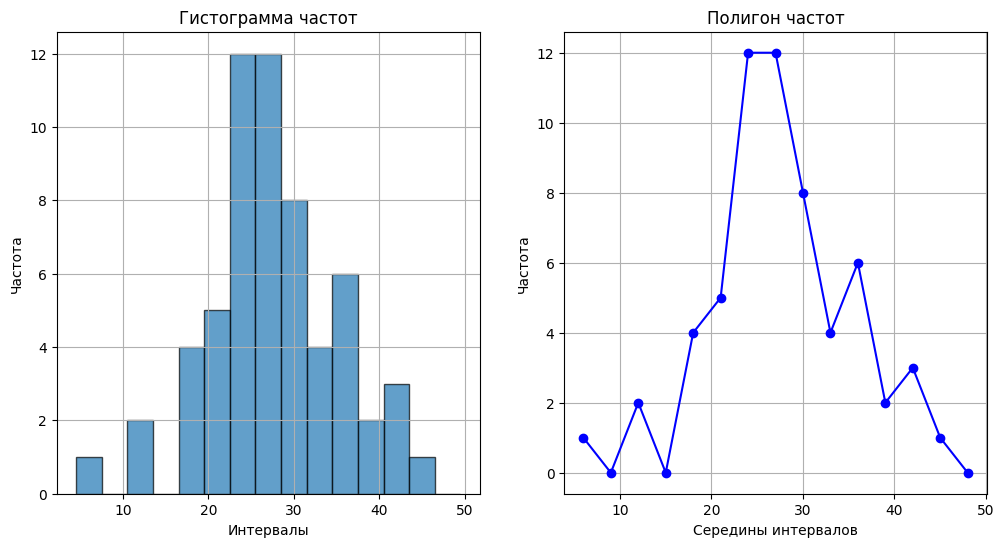

In [41]:
x0 = x_min - len_intervals/2
intervals_ = [x0 + i * len_intervals for i in range(counts_intrvals + 1)]

midpoints = [(intervals_[i] + intervals_[i + 1]) / 2 for i in range(len(intervals_) - 1)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(order, bins=intervals_, edgecolor='black', alpha=0.7)
plt.title('Гистограмма частот')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(midpoints, frequencies, marker='o', linestyle='-', color='b')
plt.title('Полигон частот')
plt.xlabel('Середины интервалов')
plt.ylabel('Частота')
plt.grid(True)

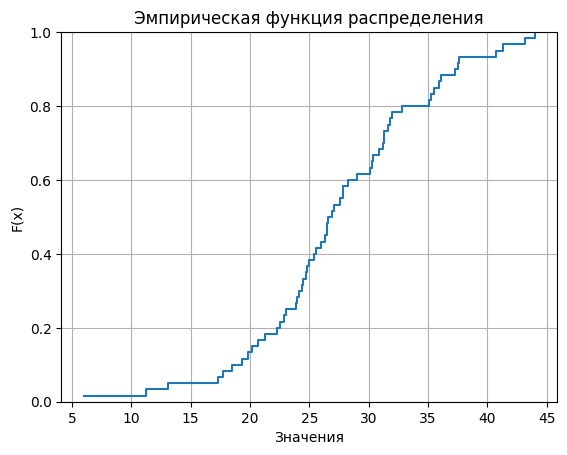

In [38]:
empirical_cdf = [i / order_counts for i in range(1, order_counts + 1)]

plt.step(order, empirical_cdf, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [39]:
from collections import Counter

mean_value = round(sum(order) / order_counts,3)
corrected_variance = round(sum((x - mean_value) ** 2 for x in order) / (order_counts - 1), 3)

frequency = Counter(order)
mode = round(max(frequency.keys(), key=frequency.get),3)

if order_counts % 2 == 1: 
    median = order[order_counts // 2]
else:
    mid1 = order[order_counts // 2 - 1]
    mid2 = order[order_counts // 2]
    median = (mid1 + mid2) / 2

std_dev = corrected_variance ** 0.5

asymmetry = (order_counts / ((order_counts - 1) * (order_counts - 2))) *  sum(((x - mean_value) / std_dev) ** 3 for x in order)

if order_counts > 3:
    n = order_counts
    excess = (
        (n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3)) * sum(((x - mean_value) / std_dev) ** 4 for x in order)
        - 3 * (n - 1) ** 2 / ((n - 2) * (n - 3))
    )
    excess = round(excess,3)
else:
    excess = None

if n > 2:
    asymmetry = (n / ((n - 1) * (n - 2))) * sum(((x - mean_value) / std_dev) ** 3 for x in order)
    asymmetry = round(asymmetry,3)

In [40]:
print(f' Выборочное среднее = {mean_value}', '\n',
      f'Исправленная выборочная дисперсия = {corrected_variance}', '\n',
      f'Мода = {mode}', '\n',
      f'Медиана = {median}', '\n',
      f'Эксцесс = {excess}', '\n',
      f'Ассиметрия = {asymmetry}', '\n')

 Выборочное среднее = 27.53 
 Исправленная выборочная дисперсия = 56.585 
 Мода = 26.5 
 Медиана = 26.75 
 Эксцесс = 0.517 
 Ассиметрия = -0.139 

